<a href="https://colab.research.google.com/github/shwetajain1022/Project-4/blob/main/AUS_solar_model_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [113]:
import matplotlib.pyplot as plt
# import seaborn as sns

In [114]:
import pandas as pd
import numpy as np

In [115]:
df = pd.read_csv("model_data/energyconsumptiongdppopulation.csv")
print(df.head())

  country_code    country  distribution_losses_electricity  \
0          ARG  Argentina                              0.0   
1          ARG  Argentina                              0.0   
2          ARG  Argentina                              0.0   
3          ARG  Argentina                              0.0   
4          ARG  Argentina                              0.0   

   coal_peat_and_manufactured_gases  combustible_renewables  geothermal  \
0                          254.9680                103.7220         0.0   
1                           59.6120                 23.6500         0.0   
2                          276.3790                 57.9470         0.0   
3                          189.0145                 56.9715         0.0   
4                            0.0000                 97.5631         0.0   

       hydro  natural_gas   nuclear  oil_and_petroleum_products  ...  \
0  1890.1710    6962.6050  356.1880                   1383.5360  ...   
1  2367.2000    6072.3430  717.6

In [116]:
df_v1 = df.groupby('date').agg({'coal_peat_and_manufactured_gases':'sum','combustible_renewables':sum,'geothermal':sum,'hydro':sum,'natural_gas':sum,'nuclear':sum,'oil_and_petroleum_products':sum,'other_combustible_non-renewables':sum,'other_renewables':sum,'others':sum,
'solar':sum,'wind':sum})

In [117]:
df_v1

,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,other_combustible_non-renewables,other_renewables,others,solar,wind
date,,,,,,,,,,,,
2010-01-01,311991.1640,18202.8090,3356.9010,131035.6110,199809.0490,187969.0790,26682.2510,3062.9160,41.0500,2534.6670,1076.0940,21616.8000
2010-02-01,276402.0780,16717.4690,2984.3550,117189.9490,178434.1900,169149.6580,21968.6970,2788.0090,41.3720,2526.8510,1378.9700,21277.0260
2010-03-01,265732.1940,17658.2930,3391.5310,123161.8680,180740.5970,173323.5120,21673.5990,2950.8590,41.9100,2549.7430,2348.3880,27260.6550
2010-04-01,229405.7240,16490.0620,3273.1020,111134.5450,171501.7060,156336.2310,17388.3670,3249.2240,41.7740,2616.7980,2892.5200,22196.1880
2010-05-01,247530.2920,16434.7780,3397.0200,123029.3400,177826.5100,160783.4410,18428.2440,3229.2590,42.0600,2626.2380,2926.3750,21266.3450
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,748763.0239,46874.4274,4400.9389,322041.9002,328446.8496,186495.0140,20149.2505,6210.2390,42.7549,4068.1742,87288.4173,123101.1799
2021-09-01,658995.4190,43514.9692,4377.8076,307944.0844,285592.0638,177400.2368,18796.3525,5500.4376,42.7549,3351.7204,80400.0077,121241.3980
2021-10-01,621900.4276,43385.8216,4485.9739,281977.5543,279183.2472,173983.0445,19698.3598,5221.9036,42.7549,3396.5781,72565.3087,156484.3566


In [118]:
# df_v1["renewable_production"] = df_v1["solar"]+df_v1["wind"]+df_v1["geothermal"]+\
# df_v1["other_renewables"]+df_v1["combustible_renewables"]

In [119]:
df_v1["nonrenewable_production"] = df_v1["coal_peat_and_manufactured_gases"]+df_v1["nuclear"]+df_v1["oil_and_petroleum_products"]\
+df_v1["other_combustible_non-renewables"]+df_v1["natural_gas"]

In [120]:
df_v1.reset_index()

,date,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,other_combustible_non-renewables,other_renewables,others,solar,wind,nonrenewable_production
0,2010-01-01,311991.1640,18202.8090,3356.9010,131035.6110,199809.0490,187969.0790,26682.2510,3062.9160,41.0500,2534.6670,1076.0940,21616.8000,7.295145e+05
1,2010-02-01,276402.0780,16717.4690,2984.3550,117189.9490,178434.1900,169149.6580,21968.6970,2788.0090,41.3720,2526.8510,1378.9700,21277.0260,6.487426e+05
2,2010-03-01,265732.1940,17658.2930,3391.5310,123161.8680,180740.5970,173323.5120,21673.5990,2950.8590,41.9100,2549.7430,2348.3880,27260.6550,6.444208e+05
3,2010-04-01,229405.7240,16490.0620,3273.1020,111134.5450,171501.7060,156336.2310,17388.3670,3249.2240,41.7740,2616.7980,2892.5200,22196.1880,5.778813e+05
4,2010-05-01,247530.2920,16434.7780,3397.0200,123029.3400,177826.5100,160783.4410,18428.2440,3229.2590,42.0600,2626.2380,2926.3750,21266.3450,6.077977e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021-08-01,748763.0239,46874.4274,4400.9389,322041.9002,328446.8496,186495.0140,20149.2505,6210.2390,42.7549,4068.1742,87288.4173,123101.1799,1.290064e+06
140,2021-09-01,658995.4190,43514.9692,4377.8076,307944.0844,285592.0638,177400.2368,18796.3525,5500.4376,42.7549,3351.7204,80400.0077,121241.3980,1.146285e+06
141,2021-10-01,621900.4276,43385.8216,4485.9739,281977.5543,279183.2472,173983.0445,19698.3598,5221.9036,42.7549,3396.5781,72565.3087,156484.3566,1.099987e+06
142,2021-11-01,651748.1628,44833.2676,4426.5902,253593.6225,286156.6316,176606.6914,19500.4559,5256.0789,42.7549,3443.7757,63155.8928,162107.3777,1.139268e+06


In [121]:
df_v1.sort_values('date')

,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,other_combustible_non-renewables,other_renewables,others,solar,wind,nonrenewable_production
date,,,,,,,,,,,,,
2010-01-01,311991.1640,18202.8090,3356.9010,131035.6110,199809.0490,187969.0790,26682.2510,3062.9160,41.0500,2534.6670,1076.0940,21616.8000,7.295145e+05
2010-02-01,276402.0780,16717.4690,2984.3550,117189.9490,178434.1900,169149.6580,21968.6970,2788.0090,41.3720,2526.8510,1378.9700,21277.0260,6.487426e+05
2010-03-01,265732.1940,17658.2930,3391.5310,123161.8680,180740.5970,173323.5120,21673.5990,2950.8590,41.9100,2549.7430,2348.3880,27260.6550,6.444208e+05
2010-04-01,229405.7240,16490.0620,3273.1020,111134.5450,171501.7060,156336.2310,17388.3670,3249.2240,41.7740,2616.7980,2892.5200,22196.1880,5.778813e+05
2010-05-01,247530.2920,16434.7780,3397.0200,123029.3400,177826.5100,160783.4410,18428.2440,3229.2590,42.0600,2626.2380,2926.3750,21266.3450,6.077977e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,748763.0239,46874.4274,4400.9389,322041.9002,328446.8496,186495.0140,20149.2505,6210.2390,42.7549,4068.1742,87288.4173,123101.1799,1.290064e+06
2021-09-01,658995.4190,43514.9692,4377.8076,307944.0844,285592.0638,177400.2368,18796.3525,5500.4376,42.7549,3351.7204,80400.0077,121241.3980,1.146285e+06
2021-10-01,621900.4276,43385.8216,4485.9739,281977.5543,279183.2472,173983.0445,19698.3598,5221.9036,42.7549,3396.5781,72565.3087,156484.3566,1.099987e+06


In [122]:
df_v1=df_v1.reset_index()

In [123]:
df_v1

,date,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,other_combustible_non-renewables,other_renewables,others,solar,wind,nonrenewable_production
0,2010-01-01,311991.1640,18202.8090,3356.9010,131035.6110,199809.0490,187969.0790,26682.2510,3062.9160,41.0500,2534.6670,1076.0940,21616.8000,7.295145e+05
1,2010-02-01,276402.0780,16717.4690,2984.3550,117189.9490,178434.1900,169149.6580,21968.6970,2788.0090,41.3720,2526.8510,1378.9700,21277.0260,6.487426e+05
2,2010-03-01,265732.1940,17658.2930,3391.5310,123161.8680,180740.5970,173323.5120,21673.5990,2950.8590,41.9100,2549.7430,2348.3880,27260.6550,6.444208e+05
3,2010-04-01,229405.7240,16490.0620,3273.1020,111134.5450,171501.7060,156336.2310,17388.3670,3249.2240,41.7740,2616.7980,2892.5200,22196.1880,5.778813e+05
4,2010-05-01,247530.2920,16434.7780,3397.0200,123029.3400,177826.5100,160783.4410,18428.2440,3229.2590,42.0600,2626.2380,2926.3750,21266.3450,6.077977e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021-08-01,748763.0239,46874.4274,4400.9389,322041.9002,328446.8496,186495.0140,20149.2505,6210.2390,42.7549,4068.1742,87288.4173,123101.1799,1.290064e+06
140,2021-09-01,658995.4190,43514.9692,4377.8076,307944.0844,285592.0638,177400.2368,18796.3525,5500.4376,42.7549,3351.7204,80400.0077,121241.3980,1.146285e+06
141,2021-10-01,621900.4276,43385.8216,4485.9739,281977.5543,279183.2472,173983.0445,19698.3598,5221.9036,42.7549,3396.5781,72565.3087,156484.3566,1.099987e+06
142,2021-11-01,651748.1628,44833.2676,4426.5902,253593.6225,286156.6316,176606.6914,19500.4559,5256.0789,42.7549,3443.7757,63155.8928,162107.3777,1.139268e+06


In [124]:
# Get date range of data
print(f'Latest date: {df_v1.date.max()}')
print(f'Latest date: {df_v1.date.min()}')

Latest date: 2021-12-01
Latest date: 2010-01-01


In [125]:
# Convert date to datetime datatype
df_v1['date'] = df_v1['date'].astype('datetime64[ns]')

# Check datatypes
df_v1.dtypes

date                                datetime64[ns]
coal_peat_and_manufactured_gases           float64
combustible_renewables                     float64
geothermal                                 float64
hydro                                      float64
natural_gas                                float64
nuclear                                    float64
oil_and_petroleum_products                 float64
other_combustible_non-renewables           float64
other_renewables                           float64
others                                     float64
solar                                      float64
wind                                       float64
nonrenewable_production                    float64
dtype: object

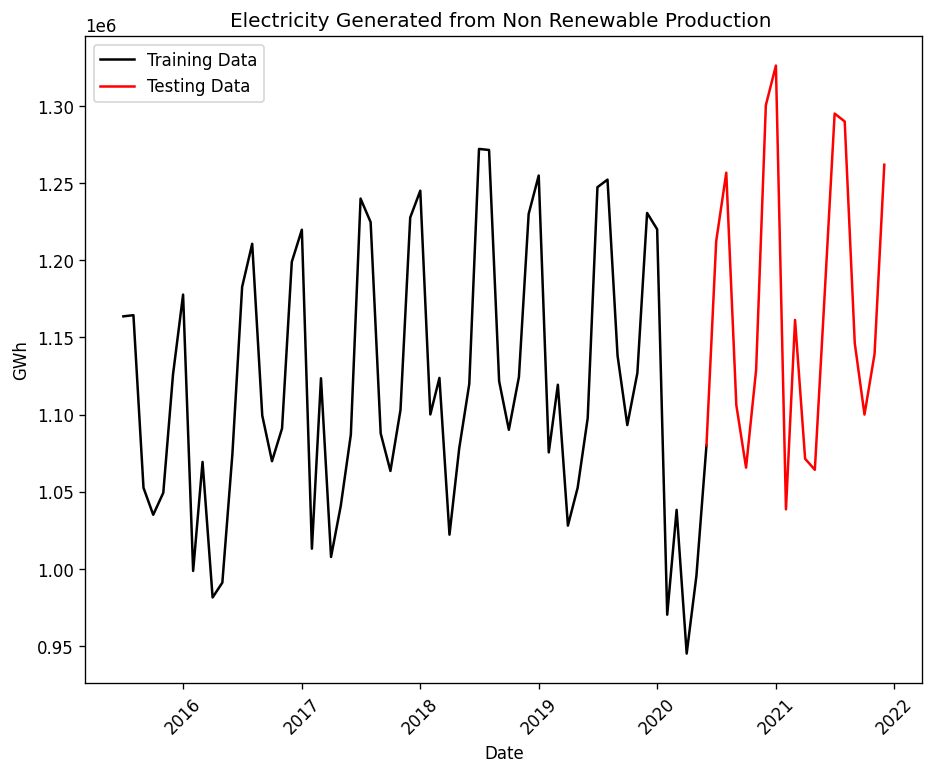

In [126]:
# Set date parameters for train and test data
train = df_v1[(df_v1["date"] < pd.to_datetime("2020-07-01", format='%Y-%m-%d')) & (df_v1["date"] >= pd.to_datetime("2015-07-01", format='%Y-%m-%d'))]
test = df_v1[df_v1["date"] >= pd.to_datetime("2020-06-01", format='%Y-%m-%d')]

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production ")
plt.legend()
plt.show()

In [127]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              144 non-null    datetime64[ns]
 1   coal_peat_and_manufactured_gases  144 non-null    float64       
 2   combustible_renewables            144 non-null    float64       
 3   geothermal                        144 non-null    float64       
 4   hydro                             144 non-null    float64       
 5   natural_gas                       144 non-null    float64       
 6   nuclear                           144 non-null    float64       
 7   oil_and_petroleum_products        144 non-null    float64       
 8   other_combustible_non-renewables  144 non-null    float64       
 9   other_renewables                  144 non-null    float64       
 10  others                            144 non-null    

In [128]:
# Import model dependencies
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [129]:
# Set y value to training data
y = train['nonrenewable_production']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


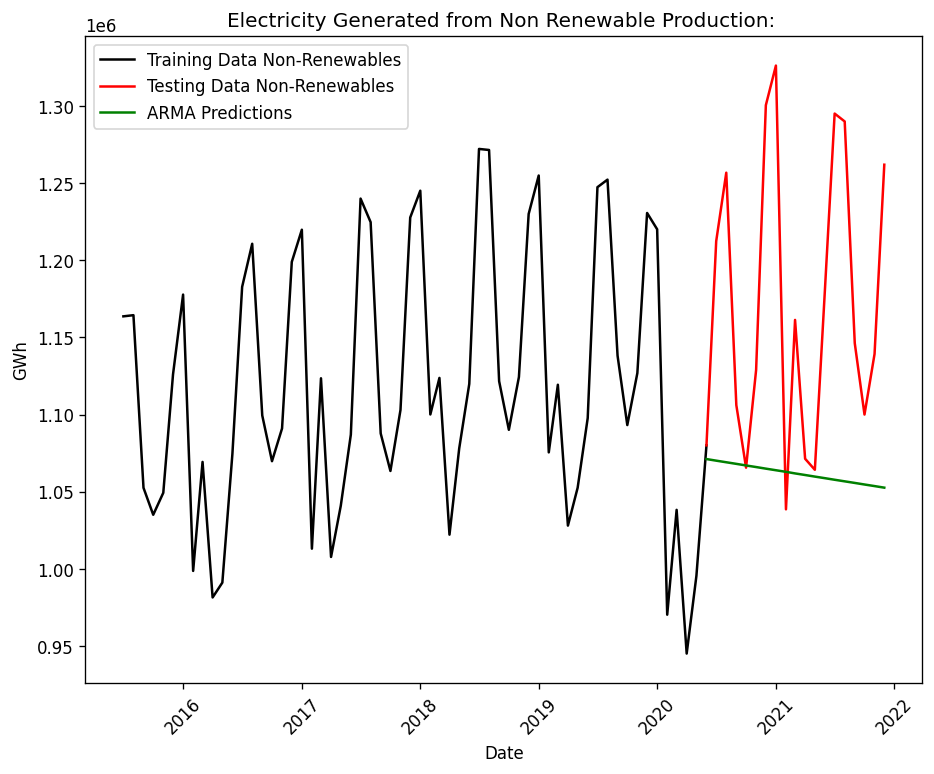

ARMA RMSE:  142035.17197524596


In [130]:
# Set initial inputs and parameters for ARMA model
ARMAmodel = SARIMAX(y, order = (1, 0, 1), enforce_stationarity=False)

# Fit model
ARMAmodel = ARMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arma = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data Non-Renewables")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data Non-Renewables")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production: ")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arma_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with

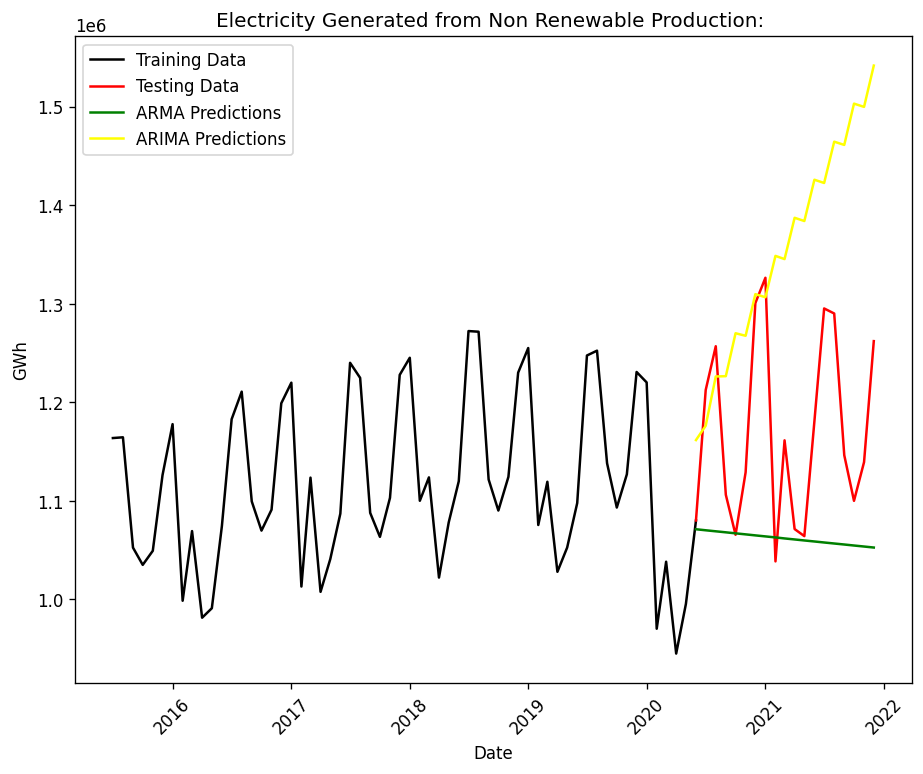

ARIMA RMSE:  228623.8459614118


In [131]:
# Set initial inputs and parameters for ARIMA model
ARIMAmodel = ARIMA(y, order = (2, 2, 2))

# Fit model
ARIMAmodel = ARIMAmodel.fit()

# Set other inputs and parameters for model
y_pred = ARIMAmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_arima = y_pred_df["Predictions"]

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production: ")
plt.plot(y_pred_out_arma, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
arima_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arima_rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: Con

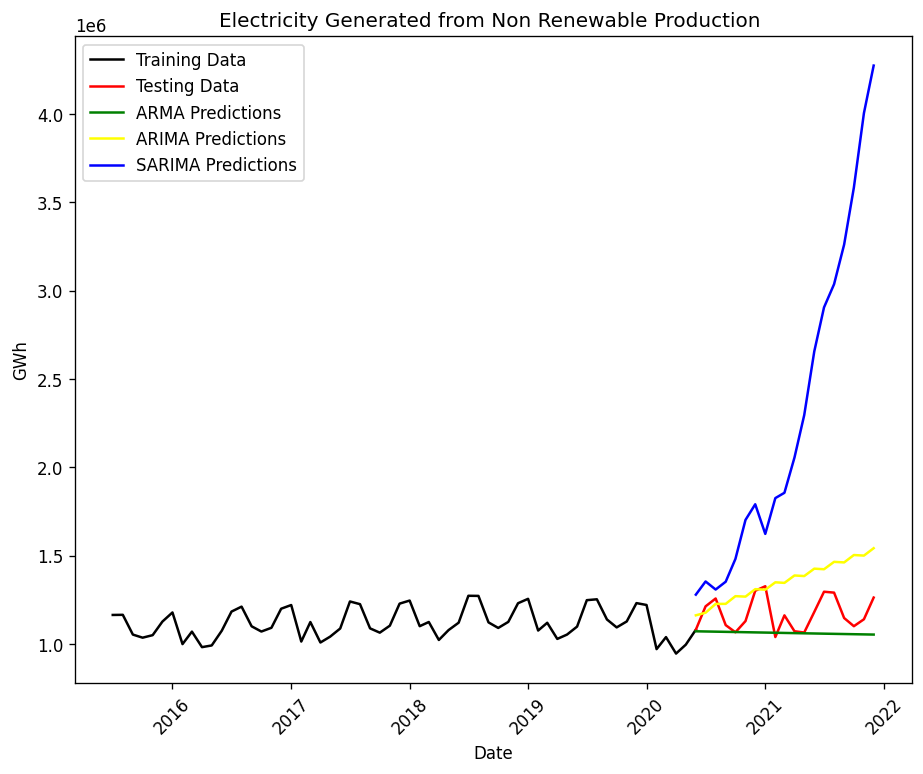

SARIMA RMSE:  1456052.1716539368


In [132]:
# Set initial inputs and parameters for SARIMA model
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))

# Fit model
SARIMAXmodel = SARIMAXmodel.fit()

# Set other inputs and parameters for model
y_pred = SARIMAXmodel.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_sarima = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production ")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
sarima_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

In [110]:
# Check data for stationarity using Dickey-Fuller test
# For stationarity to be present, p-value < 0.05

# Import dependencies
from statsmodels.tsa.stattools import adfuller

# Apply test to data
result = adfuller(y)

# Print results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# Given p-value > 0.05, data is not stationary

ADF Statistic: -2.678803
p-value: 0.077779
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with

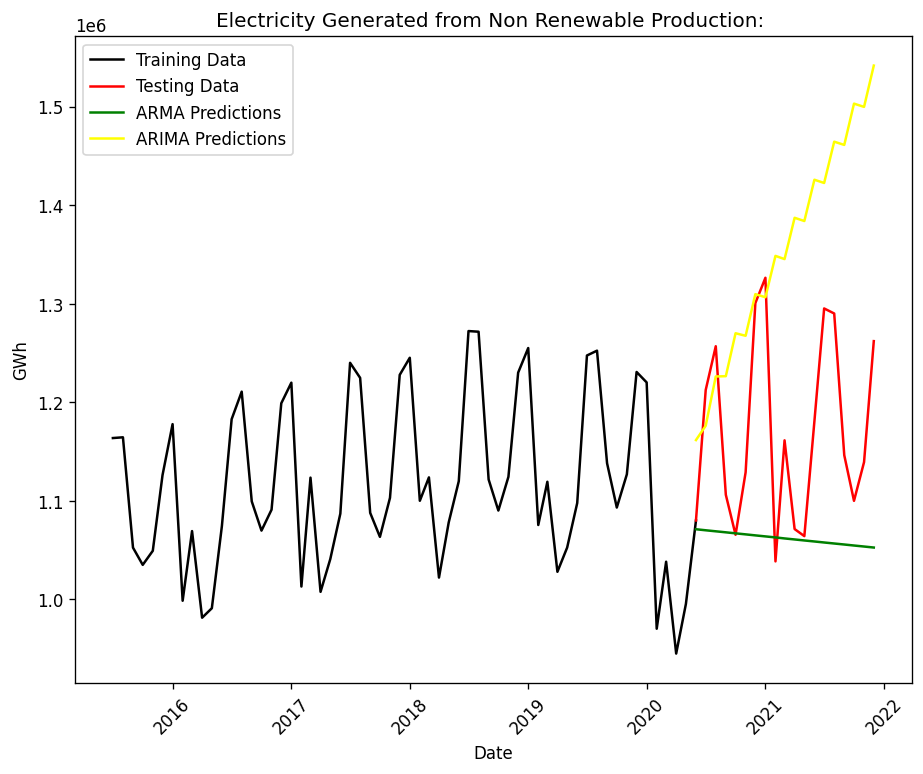

ARIMA RMSE:  228623.8459614118


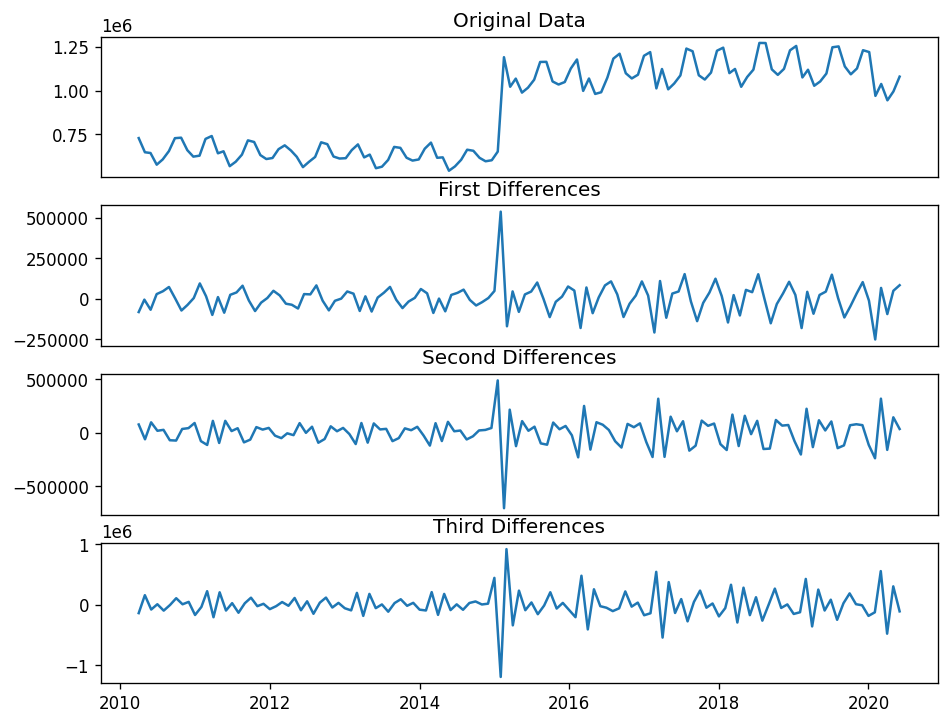

In [42]:
# Test for optimal SARIMA d-value - for (p,d,q) variables
# The d-value controls the model's integration order of the data
# The best d-value will be represented by whether 1st/2nd order differences produce data that stationary, but not increasingly noisy.

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(train['date'], y); ax1.set_title('Original Data'); ax1.axes.xaxis.set_visible(False)
# 1st Differences
ax2.plot(train['date'], y.diff()); ax2.set_title('First Differences'); ax2.axes.xaxis.set_visible(False)
# 2nd Differences
ax3.plot(train['date'], y.diff().diff()); ax3.set_title('Second Differences'); ax3.axes.xaxis.set_visible(False)
# 3rd Differences
ax4.plot(train['date'], y.diff().diff().diff()); ax4.set_title('Third Differences')
plt.show()

# First differences show data being stationary
# Second differences show increased noise (vs. first differences)
# Result is that d = 1 is optimal

In [52]:
# Create empty dictionary to store test outputs
optimal_d = {}

# Testing for optimal "d"
for d in range(0,7):
  # Set initial inputs and parameters for SARIMA model
  SARIMAXmodel_d = ARIMA(y, order = (5, d, 2))

  # Fit model
  SARIMAXmodel_d = SARIMAXmodel_d.fit()

  # Set other inputs and parameters for model
  y_pred = SARIMAXmodel_d.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05) 
  y_pred_df["Predictions"] = SARIMAXmodel_d.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_sarima_d = y_pred_df["Predictions"] 

  # Compute RMSE and print result
  sarima_d_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))

  # Add RMSE output to dictionary
  optimal_d[d] = sarima_d_rmse

# Print dictionary results
print(optimal_d)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-inv

{0: 165344.81562002303, 1: 167817.257584864, 2: 107652.80500716648, 3: 195081.36872470818, 4: 5294702.7940024715, 5: 31238787.014354195, 6: 40013391.83589488}


d = 2 yields lowest RMSE

{0: 165344.81562002303, 1: 167817.257584864, 2: 107652.80500716648, 3: 195081.36872470818, 4: 5294702.7940024715, 5: 31238787.014354195, 6: 40013391.83589488}

In [53]:
# Set "d" value
d = 2

# Create empty dictionary to store test results
optimal_p = {}

# Testing for optimal "p"
for p in range(0,10):
  # Set initial inputs and parameters for SARIMA model
  SARIMAXmodel_p = ARIMA(y, order = (p, d, 2))

  # Fit model
  SARIMAXmodel_p = SARIMAXmodel_p.fit()

  # Set other inputs and parameters for model
  y_pred = SARIMAXmodel_p.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05) 
  y_pred_df["Predictions"] = SARIMAXmodel_p.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_sarima_p = y_pred_df["Predictions"] 

  # Compute RMSE and print result
  sarima_p_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))

  optimal_p[p] = sarima_p_rmse

print(optimal_p)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

{0: 97366.27241397863, 1: 99350.46283147122, 2: 102438.3922122338, 3: 136103.87868680147, 4: 143418.54138739462, 5: 107652.80500716648, 6: 217103.70309959337, 7: 184735.18017226626, 8: 153674.65641576753, 9: 141857.4668109964}


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p = 0 yields lowest RMSE

{0: 97366.27241397863, 1: 99350.46283147122, 2: 102438.3922122338, 3: 136103.87868680147, 4: 143418.54138739462, 5: 107652.80500716648, 6: 217103.70309959337, 7: 184735.18017226626, 8: 153674.65641576753, 9: 141857.4668109964}


In [54]:
# Set "d" and "p" value
d = 2
p = 0

# Create empty dictionary to store test results
optimal_q = {}

# Testing for optimal "q"
for q in range(0,10):
  # Set initial inputs and parameters for SARIMA model
  SARIMAXmodel_q = ARIMA(y, order = (p, d, q))

  # Fit model
  SARIMAXmodel_q = SARIMAXmodel_q.fit()

  # Set other inputs and parameters for model
  y_pred = SARIMAXmodel_q.get_forecast(len(test.date))
  y_pred_df = y_pred.conf_int(alpha = 0.05) 
  y_pred_df["Predictions"] = SARIMAXmodel_q.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
  y_pred_df.index = test.date
  y_pred_out_sarima_q = y_pred_df["Predictions"] 

  # Compute RMSE and print result
  sarima_q_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))

  optimal_q[q] = sarima_q_rmse

print(optimal_q)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

{0: 886440.2203950267, 1: 98079.84240123256, 2: 97366.27241397863, 3: 104286.97338618875, 4: 102617.73396578508, 5: 104202.14386966886, 6: 170944.94711274272, 7: 189915.37377389125, 8: 192660.83307029825, 9: 172294.3191619731}


q = 0 yields lowest RMSE

Test Results : 
{0: 886440.2203950267, 1: 98079.84240123256, 2: 97366.27241397863, 3: 104286.97338618875, 4: 102617.73396578508, 5: 104202.14386966886, 6: 170944.94711274272, 7: 189915.37377389125, 8: 192660.83307029825, 9: 172294.3191619731}

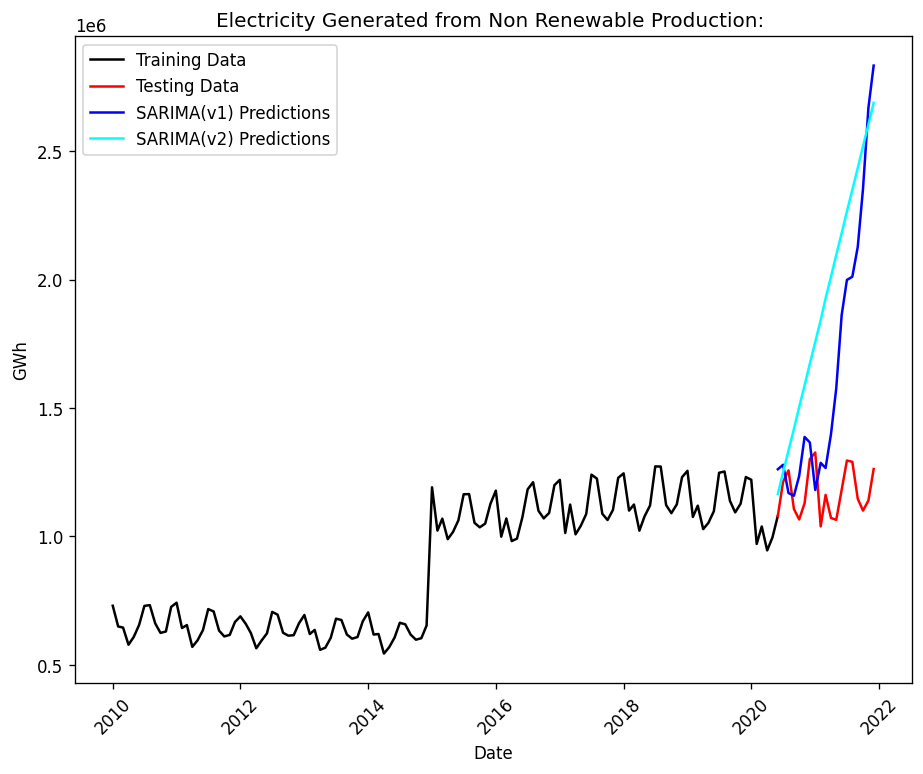

SARIMA_v1 RMSE:  704429.6662405268
SARIMA_v2 RMSE:  886440.2203950267


In [56]:
# Set "d", "p" and "q" value
d = 2
p = 0
q = 0

# Set initial inputs and parameters for SARIMA model V2
SARIMAXmodel_v2 = ARIMA(y, order = (p, d, q))

# Fit model
SARIMAXmodel_v2 = SARIMAXmodel_v2.fit()

# Set other inputs and parameters for model
y_pred = SARIMAXmodel_v2.get_forecast(len(test.date))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel_v2.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.date
y_pred_out_sarima_v2 = y_pred_df["Predictions"] 

# Plot data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non Renewable Production: ")
plt.plot(y_pred_out_sarima, color='Blue', label = 'ARIMA(v1) Predictions')
plt.plot(y_pred_out_sarima_v2, color='Cyan', label = 'ARIMA(v2) Predictions')
plt.legend()
plt.show()

# Compute RMSE and print result
sarima_v2_rmse = np.sqrt(mean_squared_error(test["nonrenewable_production"].values, y_pred_df["Predictions"]))
print("SARIMA_v1 RMSE: ",sarima_rmse)
print("SARIMA_v2 RMSE: ",sarima_v2_rmse)

In [57]:
# Set "d", "p" and "q" value
d = 2
p = 0
q = 0

# Use Sarima model to forecast datapoints
SARIMAXmodel_fcast = ARIMA(y, order = (p, d, q))

# Fit model
SARIMAXmodel_fcast = SARIMAXmodel_fcast.fit()


In [58]:
# Create forecast date range, monthly frequency
index_future_dates=pd.date_range(start='2022-01-01',end='2025-01-01', freq='MS')

# Predict data for forecast date range using SARIMA model
pred=SARIMAXmodel_fcast.predict(start=len(df_v1),end=len(df_v1)+36,typ='levels').rename('SARIMA Predictions')

# Set forecast date range to index
pred.index=index_future_dates

#Print forecast data
print(pred)

2022-01-01    2.688240e+06
2022-02-01    2.772883e+06
2022-03-01    2.857525e+06
2022-04-01    2.942168e+06
2022-05-01    3.026810e+06
2022-06-01    3.111453e+06
2022-07-01    3.196095e+06
2022-08-01    3.280738e+06
2022-09-01    3.365380e+06
2022-10-01    3.450023e+06
2022-11-01    3.534665e+06
2022-12-01    3.619308e+06
2023-01-01    3.703950e+06
2023-02-01    3.788593e+06
2023-03-01    3.873235e+06
2023-04-01    3.957877e+06
2023-05-01    4.042520e+06
2023-06-01    4.127162e+06
2023-07-01    4.211805e+06
2023-08-01    4.296447e+06
2023-09-01    4.381090e+06
2023-10-01    4.465732e+06
2023-11-01    4.550375e+06
2023-12-01    4.635017e+06
2024-01-01    4.719660e+06
2024-02-01    4.804302e+06
2024-03-01    4.888945e+06
2024-04-01    4.973587e+06
2024-05-01    5.058230e+06
2024-06-01    5.142872e+06
2024-07-01    5.227514e+06
2024-08-01    5.312157e+06
2024-09-01    5.396799e+06
2024-10-01    5.481442e+06
2024-11-01    5.566084e+06
2024-12-01    5.650727e+06
2025-01-01    5.735369e+06
F

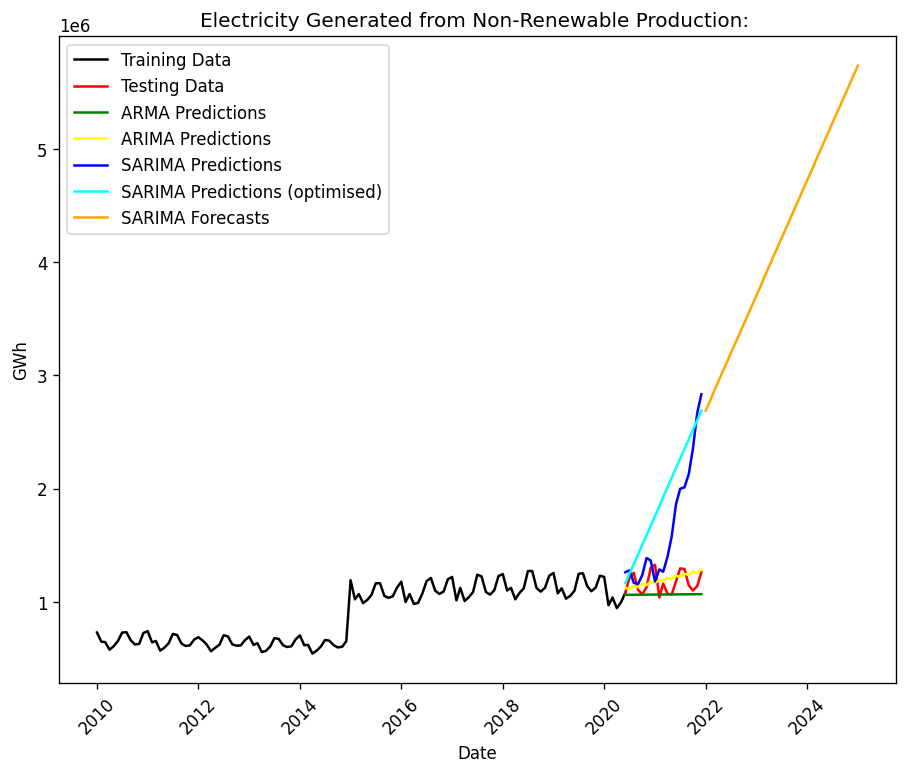

In [59]:
# Plot forecast data
plt.plot(train['date'],train['nonrenewable_production'], color = "black", label= "Training Data")
plt.plot(test['date'],test['nonrenewable_production'], color = "red", label= "Testing Data")
plt.ylabel('GWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Electricity Generated from Non-Renewable Production: ")
plt.plot(y_pred_out_arma, color='Green', label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_sarima, color='Blue', label = 'SARIMA Predictions')
plt.plot(y_pred_out_sarima_v2, color='Cyan', label = 'SARIMA Predictions (optimised)')
plt.plot(pred.index,pred, color='Orange', label= 'SARIMA Forecasts')
plt.legend()
plt.show()
